## Mobile Price Classificator

In this notebook we're going to make a model to classify distinct levels of Mobiles price from a dataset.


**Context (from the dataset):**

Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.

He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.

Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.

In this problem you do not have to predict actual price but a price range indicating how high the price is.

https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification/data


In [40]:
# Importing common libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import the classifiers from Sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

## Importing more functional libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

In [12]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Mobile_Dataset/train.csv')

In [13]:
columns = dataset.columns

In [14]:
columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [16]:
## About the dataset

description = ["Total energy a battery can store in one time measured in mAh", "Has bluetooth or not", "speed at which microprocessor executes instructions", "Has dual sim support or not",
               "Front Camera mega pixels", "Has 4G or not", "Internal Memory in Gigabytes", "Mobile Depth in cm", "Weight of mobile phone", "Number of cores of processor", "Primary Camera mega pixels",
               "Pixel Resolution Height", "Pixel Resolution Width", "Random Access Memory in Megabytes", "Screen Height of mobile in cm", "Screen Width of mobile in cm", "longest time that a single battery charge will last when you are",
               "Has 3G or not", "Has touch screen or not", "Has wifi or not", "Mobile Price Range"]

pd.DataFrame({"Column":columns, "Description":description})

,Column,Description
0,battery_power,Total energy a battery can store in one time m...
1,blue,Has bluetooth or not
2,clock_speed,speed at which microprocessor executes instruc...
3,dual_sim,Has dual sim support or not
4,fc,Front Camera mega pixels
5,four_g,Has 4G or not
6,int_memory,Internal Memory in Gigabytes
7,m_dep,Mobile Depth in cm
8,mobile_wt,Weight of mobile phone
9,n_cores,Number of cores of processor


## 02. Exploratory Data Analysis

Let´s to make an Exploratory data analysis...

In [20]:
dataset.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

We can see than the dataset have a 2000 entries or observations of 21 columns. The dependent variable that we need to predict is **price range**. Is for that reason that we have 20 independient variables $(X \in R)$ and 1 dependient variable $(y \in R)$.

In [29]:
dataset.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


We also notice that all the variables are numeric, and there are several ranges of values in the variables. there are variables with a range of thousands and another with decimals. Is for that reason that we need to scale the data.





Now, lets to see what are the number of classes in the dataset...

In [26]:
dataset["price_range"].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

We have 4 classes, 0 to 4 with 500 observation for each. this means that we have a balanced dataset, that is great for the model training phase.

Let's to see the distribution of a few variables

(array([46., 41., 44., 50., 42., 40., 38., 49., 33., 39., 44., 48., 37.,
        49., 32., 37., 44., 32., 47., 39., 34., 41., 46., 37., 32., 43.,
        28., 47., 38., 29., 40., 44., 34., 37., 38., 50., 44., 31., 39.,
        37., 47., 33., 38., 37., 42., 42., 37., 33., 39., 52.]),
 array([ 501.  ,  530.94,  560.88,  590.82,  620.76,  650.7 ,  680.64,
         710.58,  740.52,  770.46,  800.4 ,  830.34,  860.28,  890.22,
         920.16,  950.1 ,  980.04, 1009.98, 1039.92, 1069.86, 1099.8 ,
        1129.74, 1159.68, 1189.62, 1219.56, 1249.5 , 1279.44, 1309.38,
        1339.32, 1369.26, 1399.2 , 1429.14, 1459.08, 1489.02, 1518.96,
        1548.9 , 1578.84, 1608.78, 1638.72, 1668.66, 1698.6 , 1728.54,
        1758.48, 1788.42, 1818.36, 1848.3 , 1878.24, 1908.18, 1938.12,
        1968.06, 1998.  ]),
 <BarContainer object of 50 artists>)

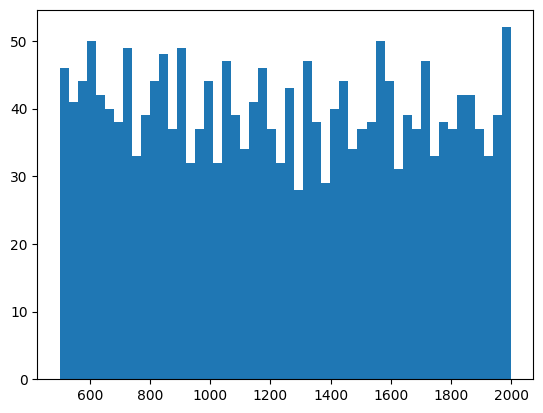

In [33]:
plt.hist(dataset.battery_power, bins = 50)

(array([67., 20., 36., 37., 77., 35., 36., 34., 67., 45., 27., 45., 57.,
        34., 34., 36., 60., 30., 24., 29., 73., 24., 39., 29., 31., 68.,
        33., 27., 24., 53., 32., 35., 40., 63., 33., 34., 26., 57., 35.,
        31., 35., 60., 29., 27., 42., 54., 27., 27., 21., 61.]),
 array([ 2.  ,  3.24,  4.48,  5.72,  6.96,  8.2 ,  9.44, 10.68, 11.92,
        13.16, 14.4 , 15.64, 16.88, 18.12, 19.36, 20.6 , 21.84, 23.08,
        24.32, 25.56, 26.8 , 28.04, 29.28, 30.52, 31.76, 33.  , 34.24,
        35.48, 36.72, 37.96, 39.2 , 40.44, 41.68, 42.92, 44.16, 45.4 ,
        46.64, 47.88, 49.12, 50.36, 51.6 , 52.84, 54.08, 55.32, 56.56,
        57.8 , 59.04, 60.28, 61.52, 62.76, 64.  ]),
 <BarContainer object of 50 artists>)

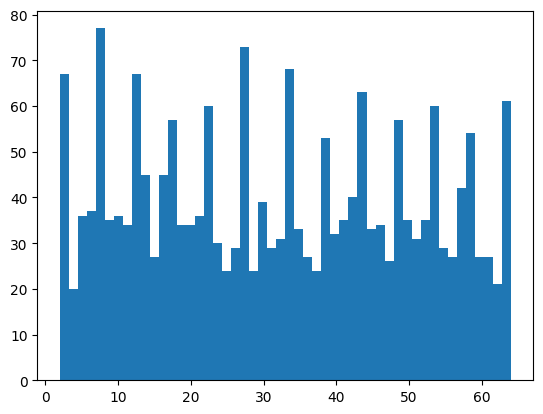

In [34]:
plt.hist(dataset.int_memory, bins = 50)

(array([49., 36., 47., 49., 28., 43., 24., 39., 47., 39., 62., 28., 53.,
        34., 37., 40., 23., 48., 34., 26., 48., 40., 50., 26., 37., 43.,
        27., 64., 25., 37., 45., 34., 57., 38., 34., 47., 27., 50., 34.,
        25., 40., 24., 58., 41., 40., 42., 30., 42., 39., 70.]),
 array([ 80. ,  82.4,  84.8,  87.2,  89.6,  92. ,  94.4,  96.8,  99.2,
        101.6, 104. , 106.4, 108.8, 111.2, 113.6, 116. , 118.4, 120.8,
        123.2, 125.6, 128. , 130.4, 132.8, 135.2, 137.6, 140. , 142.4,
        144.8, 147.2, 149.6, 152. , 154.4, 156.8, 159.2, 161.6, 164. ,
        166.4, 168.8, 171.2, 173.6, 176. , 178.4, 180.8, 183.2, 185.6,
        188. , 190.4, 192.8, 195.2, 197.6, 200. ]),
 <BarContainer object of 50 artists>)

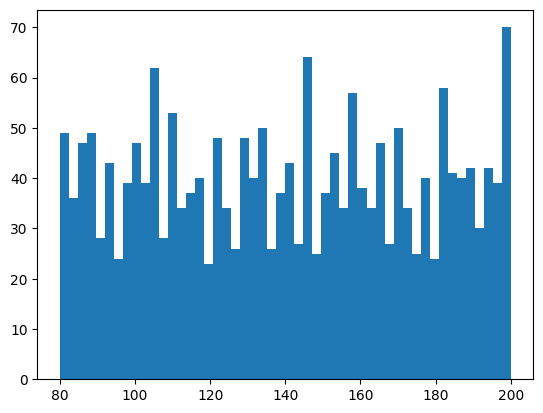

In [35]:
plt.hist(dataset.mobile_wt, bins = 50)

(array([42., 34., 48., 38., 53., 37., 40., 37., 36., 33., 42., 32., 44.,
        46., 42., 48., 41., 27., 47., 37., 33., 42., 36., 39., 39., 39.,
        35., 57., 44., 44., 42., 45., 40., 37., 38., 33., 38., 28., 44.,
        38., 42., 35., 39., 37., 44., 38., 48., 35., 47., 40.]),
 array([ 256.  ,  330.84,  405.68,  480.52,  555.36,  630.2 ,  705.04,
         779.88,  854.72,  929.56, 1004.4 , 1079.24, 1154.08, 1228.92,
        1303.76, 1378.6 , 1453.44, 1528.28, 1603.12, 1677.96, 1752.8 ,
        1827.64, 1902.48, 1977.32, 2052.16, 2127.  , 2201.84, 2276.68,
        2351.52, 2426.36, 2501.2 , 2576.04, 2650.88, 2725.72, 2800.56,
        2875.4 , 2950.24, 3025.08, 3099.92, 3174.76, 3249.6 , 3324.44,
        3399.28, 3474.12, 3548.96, 3623.8 , 3698.64, 3773.48, 3848.32,
        3923.16, 3998.  ]),
 <BarContainer object of 50 artists>)

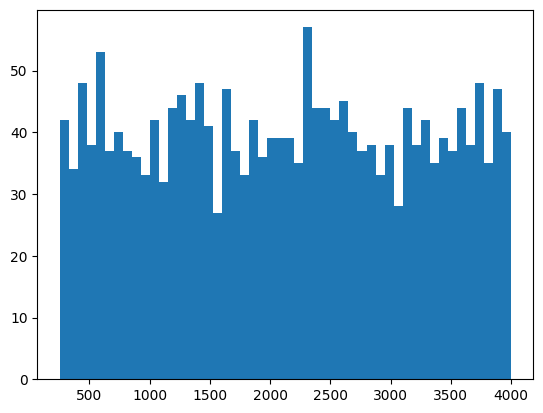

In [36]:
plt.hist(dataset.ram, bins = 50)

We can see that there is not a normal distribution in the variables...

## 03. Data Preprocessing

In this section we're going to make Data Preprocessing to give to the data the necessary variable transformation to incluide in the training step. This phase is one of the more important of the modelling generation.

In [44]:
dicotomic_variables = ["blue", "dual_sim", "four_g", "three_g", "touch_screen", "wifi"]

X = dataset.drop( dicotomic_variables + ["price_range"], axis=1)
y = dataset["price_range"]

In [49]:
scaler = MinMaxScaler(feature_range=(0,1))
X_scaled = scaler.fit_transform(X)

In [53]:
dataset_scaled = pd.DataFrame(X_scaled)

In [54]:
dataset_scaled.columns = X.columns

In [60]:
final_dataset = pd.concat([dataset_scaled, dataset[dicotomic_variables]], axis = 1)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(final_dataset, y, train_size=0.2)

In [67]:
X_train.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,blue,dual_sim,four_g,three_g,touch_screen,wifi
147,0.641283,0.76,0.157895,0.612903,0.444444,0.508333,0.857143,0.20,0.645408,0.532710,0.946820,0.785714,0.055556,0.111111,0,1,1,1,0,0
829,0.221777,0.68,0.210526,0.403226,0.888889,0.366667,0.000000,0.30,0.183163,0.597463,0.506146,0.285714,0.277778,0.277778,1,0,0,0,1,1
179,0.200401,0.68,0.105263,0.983871,0.333333,0.708333,0.857143,0.20,0.331633,0.253004,0.363709,0.857143,0.222222,0.944444,1,1,0,0,0,1
852,0.209085,0.24,0.105263,0.629032,0.777778,0.808333,0.142857,0.50,0.557143,0.604806,0.451096,0.785714,0.333333,0.555556,1,1,0,1,0,0
1752,0.959920,0.00,0.263158,0.677419,0.444444,0.341667,0.142857,0.45,0.662755,0.957944,0.866114,0.928571,0.555556,0.888889,1,1,0,0,1,0


## 04. Train the models

In this section we're going to fit three diferent classifiers in order to find the classifier that better fits to the training dataset and make better predictions in the test dataset.

We select:

* Logistic Regression
* Random Forest
* Support vector classifier

### Logistic Regression

In [125]:
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)
predictions = LR_model.predict(X_test)

In [127]:
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Precision: ", precision_score(y_test, predictions, average='weighted'))
print("Recall: ", recall_score(y_test, predictions, average='weighted'))
print("F1-Score: ", f1_score(y_test, predictions, average='weighted'))

Accuracy:  0.8075
Precision:  0.8102367555783303
Recall:  0.8075
F1-Score:  0.8074003511650508


### Random Forest

In [130]:
RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)
predictions_RFC = RFC.predict(X_test)

In [131]:
#accuracy_score(y_test, predictions_RFC)

print("Accuracy: ", accuracy_score(y_test, predictions_RFC))
print("Precision: ", precision_score(y_test, predictions_RFC, average='weighted'))
print("Recall: ", recall_score(y_test, predictions_RFC, average='weighted'))
print("F1-Score: ", f1_score(y_test, predictions_RFC, average='weighted'))

Accuracy:  0.8225
Precision:  0.8251314052871314
Recall:  0.8225
F1-Score:  0.8226599485948131


### Support Vector Machine

In [132]:
SVC_ = SVC()
SVC_.fit(X_train, y_train)
predictions_SVC = SVC_.predict(X_test)

In [133]:
#accuracy_score(y_test, predictions_SVC)

print("Accuracy: ", accuracy_score(y_test, predictions_SVC))
print("Precision: ", precision_score(y_test, predictions_SVC, average='weighted'))
print("Recall: ", recall_score(y_test, predictions_SVC, average='weighted'))
print("F1-Score: ", f1_score(y_test, predictions_SVC, average='weighted'))

Accuracy:  0.6825
Precision:  0.7247167364816253
Recall:  0.6825
F1-Score:  0.690521798859269


## 05.- Hyperparameter Tunning

In this section we're going to use Grid Search to find the best Hyperparameters to the distinct models that we are used, and with that, improve the metrics results.

### Logistic Regression

In [134]:
## Firts we need to declare a grid with the parameters that we need to ajust in the model.
param_grid_LR = {"C": np.logspace(-3,3,7),
              "penalty":["l1","l2"]}

## Next, declare the instance of the model, that in this case is Logistic Regression
Grid_LR_model = LogisticRegression()

## Next we declare gridSearch with cross validation, and CV = 5
Grid_LR_model_cv = GridSearchCV(Grid_LR_model, param_grid_LR, cv = 5)

## And Finally fit in the training set
Grid_LR_model_cv.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']})

In [135]:
## With this celd we can find the best parameters for the classifier with the Grid Seach.
Grid_LR_model_cv.best_params_

{'C': 1000.0, 'penalty': 'l2'}

In [136]:
## With best_estimator_ we can get the best model to make predictions.
Grid_LR_model_CV = Grid_LR_model_cv.best_estimator_

In [137]:
## Next, we make predictions in the test set
predictions_grid_LR = Grid_LR_model_CV.predict(X_test)

In [138]:
## And next go to compute the metrics

print("Accuracy: ", accuracy_score(y_test, predictions_grid_LR))
print("Precision: ", precision_score(y_test, predictions_grid_LR, average='weighted'))
print("Recall: ", recall_score(y_test, predictions_grid_LR, average='weighted'))
print("F1-Score: ", f1_score(y_test, predictions_grid_LR, average='weighted'))

Accuracy:  0.92625
Precision:  0.9260809095960159
Recall:  0.92625
F1-Score:  0.926124566901924


### Random Forest

In [139]:
## Firts we need to declare a grid with the parameters that we need to ajust in the model.

param_grid_RF = {'max_depth':[2,4,8],
                      'n_estimators':[10,200, 400,],
                      'max_features':[1,4,10],
                      'min_samples_leaf':[1,2,3],
                      'min_samples_split':[1,2,3]}

In [140]:
## Next, declare the instance of the model, that in this case is Logistic Regression
Grid_RFC = RandomForestClassifier()

## Next we declare gridSearch with cross validation, and CV = 5
Grid_RFC_cv = GridSearchCV(Grid_RFC, param_grid_RF, cv = 5)

## And Finally fit in the training set
Grid_RFC_cv.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
405 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/u

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 4, 8], 'max_features': [1, 4, 10],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [10, 200, 400]})

In [141]:
## With this celd we can find the best parameters for the classifier with the Grid Seach.
Grid_RFC_cv.best_params_

{'max_depth': 8,
 'max_features': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 400}

In [142]:
## With best_estimator_ we can get the best model to make predictions.
Grid_RFC_CV = Grid_RFC_cv.best_estimator_

In [143]:
## Next, we make predictions in the test set
predictions_grid_RF = Grid_RFC_CV.predict(X_test)

In [144]:
print("Accuracy: ", accuracy_score(y_test, predictions_grid_RF))
print("Precision: ", precision_score(y_test, predictions_grid_RF, average='weighted'))
print("Recall: ", recall_score(y_test, predictions_grid_RF, average='weighted'))
print("F1-Score: ", f1_score(y_test, predictions_grid_RF, average='weighted'))

Accuracy:  0.86125
Precision:  0.8624129535558335
Recall:  0.86125
F1-Score:  0.8613069966318116


### Support Vector Machine

In [145]:
## Declare the parameters grid
param_grid_SVC = {'C': [0.1, 1, 10],
              'gamma': ['scale', 'auto', 1, 0.1, 0.01],
              'kernel': ['linear', 'rbf', 'poly']}
# Declare the instance of SVC Model
Grid_SVC = SVC()

# Generate the GridSearchCV
Grid_SVC_cv = GridSearchCV(Grid_SVC, param_grid_SVC, cv = 5)

# Fit the model
Grid_SVC_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10],
                         'gamma': ['scale', 'auto', 1, 0.1, 0.01],
                         'kernel': ['linear', 'rbf', 'poly']})

In [146]:
# Get the best parameters
Grid_SVC_cv.best_params_

{'C': 10, 'gamma': 'scale', 'kernel': 'linear'}

In [147]:
# Get the best model
Grid_SVC_CV = Grid_RFC_cv.best_estimator_

In [148]:
# Make predictions in the test dataset
predictions_grid_SVC = Grid_SVC_CV.predict(X_test)

In [149]:
# Compute the metrics
print("Accuracy: ", accuracy_score(y_test, predictions_grid_SVC))
print("Precision: ", precision_score(y_test, predictions_grid_SVC, average='weighted'))
print("Recall: ", recall_score(y_test, predictions_grid_SVC, average='weighted'))
print("F1-Score: ", f1_score(y_test, predictions_grid_SVC, average='weighted'))

Accuracy:  0.86125
Precision:  0.8624129535558335
Recall:  0.86125
F1-Score:  0.8613069966318116


## 06. Conclusions

In this excercise we made predictions for a dataset that contain variables about a range prices of mobiles with Logistic Regression, Random Forest and Support Vector Classifier. We first fit the classifier with the models without specify parameters to see how the model fits to the training data. Next, we use hyperparameter tunning to improve the model with Grid Search and get the best metrics of each model.

We notice that for this problem, **Logistic Regression Classifier** is the model that fits better for the data. This is probably because all the data that are used is numeric, without any one-hot encoding, and Linear Models and Logistic Regression is a greath algorith to use with it.

I think that is important to add other variables related to the mobile appareance, for example the mobiles colors, to have a more complete dataset that can have influence in the mobile's price.


